In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [4]:
df.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], inplace=True)

In [5]:
df.rename(columns={'v1' : 'target', 'v2' : 'Text'}, inplace=True)

In [6]:
df.head(2)

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df.head(5)

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

target    0
Text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep="first")

In [13]:
# df.head()
df.duplicated().sum()

0

# EDA

In [14]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

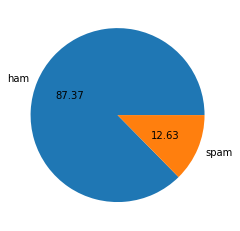

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [16]:
#Dataset is imbalanced

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muxair\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['Text'].apply(len)

In [20]:
df.head()

,target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# fetch the number of words

In [22]:
# Break your msg on the basis of Words

# word tokenize break the sentences into words of list
# df['Text'].apply(lambda x : nltk.word_tokenize(x))

# this line will count the number of words in each list for each msg is List of words
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [23]:
df.head(5)

,target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# Break your msg on the basis of sentences
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:

# Description of spam msgs
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:

# Description of ham msgs
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

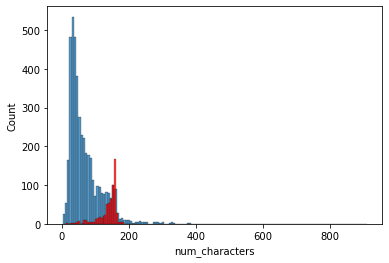

In [29]:
# camparasion of the number of characters between spam and ham

import seaborn as sns

sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

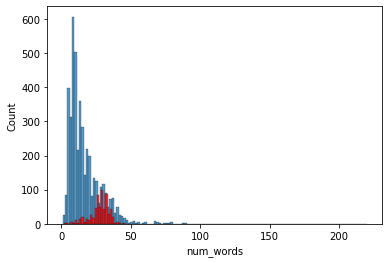

In [30]:
# camparasion of the number of words between spam and ham

import seaborn as sns

sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

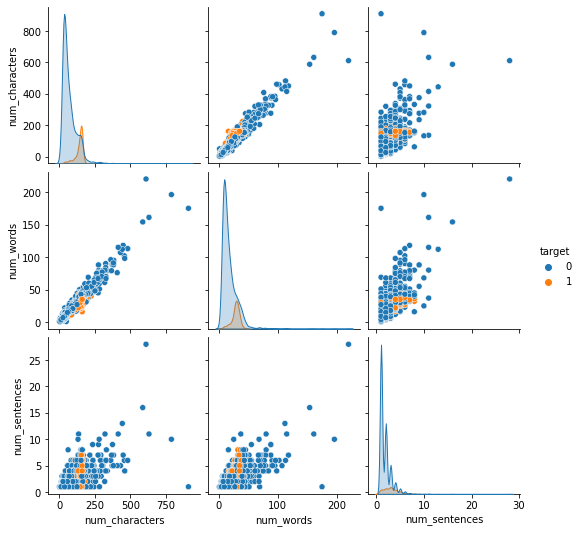

In [31]:
sns.pairplot(df, hue = 'target')

In [32]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

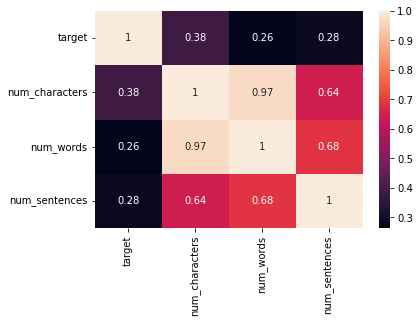

In [33]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
1) Lower Case
2) Tokenization
3) Removing Special Characters
4) Removing stop words and punctuations
5) Stunning

In [34]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stopwords.words('english')
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i )
    

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [35]:
# from nltk.corpus import stopwords
# stopwords.words('english')

In [36]:
transform_text("Hi How Are you Uzair %% eg and where are you doing job now?")

'hi uzair eg job'

In [37]:
transform_text("I loved unknown!")

'love unknown'

In [38]:
df['tranformed_text'] = df['Text'].apply(transform_text)

In [39]:
df.head()

,target,Text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['tranformed_text'].str.cat(sep=" "))

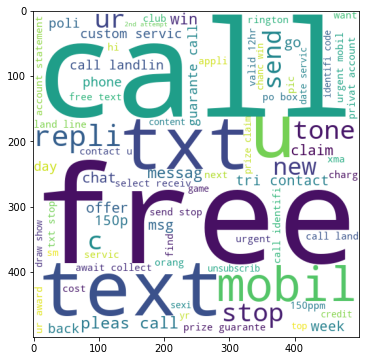

In [42]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 0]['tranformed_text'].str.cat(sep=" "))

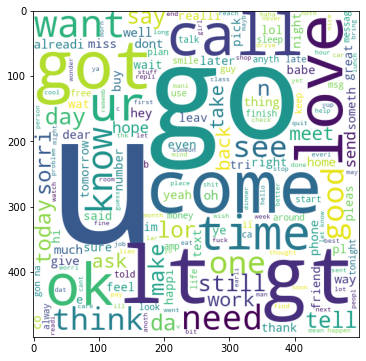

In [45]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [46]:
df.head()

,target,Text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_carpus = []
for msg in df[df['target'] == 1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_carpus.append(word)
        
print(spam_carpus,"\n\n")

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [48]:
len(spam_carpus)

9939

In [49]:
from collections import Counter
pd.DataFrame(Counter(spam_carpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\muxair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


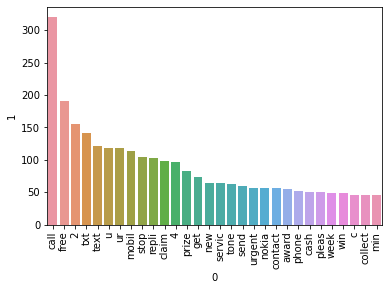

In [50]:
sns.barplot(pd.DataFrame(pd.DataFrame(Counter(spam_carpus).most_common(30)))[0],pd.DataFrame(pd.DataFrame(Counter(spam_carpus).most_common(30)))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
spam_carpus = []
for msg in df[df['target'] == 0]['tranformed_text'].tolist():
    for word in msg.split():
        spam_carpus.append(word)
        
print(spam_carpus,"\n\n")

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

In [52]:
from collections import Counter
pd.DataFrame(Counter(spam_carpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\muxair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


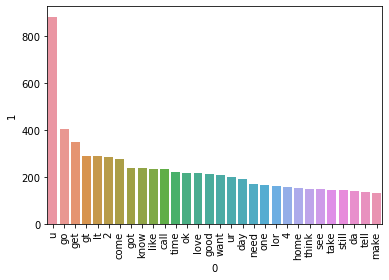

In [53]:
sns.barplot(pd.DataFrame(pd.DataFrame(Counter(spam_carpus).most_common(30)))[0],pd.DataFrame(pd.DataFrame(Counter(spam_carpus).most_common(30)))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

In [55]:
# X = cv.fit_transform(df['tranformed_text']).toarray()
X = tfidf.fit_transform(df['tranformed_text']).toarray()

In [56]:
# transfrom data to minmax scaler because Nave_Bayes
#can't accept negative values
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)


In [57]:
X.shape

(5169, 3000)

In [58]:
y = df['target'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(x_train, y_train)

GaussianNB()

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [65]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [66]:

bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier




In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb = XGBCl

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [70]:
def train_classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [71]:
train_classifier(mnb, x_train,y_train,x_test, y_test)

(0.9709864603481625, 1.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test, y_test)
    print("For", name)
    print("Accuracy - ",current_accuracy)
    print("Precision-",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision- 0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision- 1.0
For NB
Accuracy -  0.9709864603481625
Precision- 1.0
For DT
Accuracy -  0.9294003868471954
Precision- 0.8282828282828283
For LR
Accuracy -  0.9584139264990329
Precision- 0.9702970297029703


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))